In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import sklearn.metrics as metrics
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [2]:
num_classes=4
IMAGE_SIZE = 224
IMAGE_SHAPE = [IMAGE_SIZE, IMAGE_SIZE]
batch_size=5
epochs = 10

In [3]:
resnet = ResNet50(input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3), weights="imagenet", include_top=False)
for layer in resnet.layers:
    layer.trainable = False
x = Flatten()(resnet.output)
x = Dense(128, activation="relu")(x)
x = Dense(64, activation="relu")(x)
x = Dense(num_classes, activation="softmax")(x)
model = Model(inputs=resnet.input, outputs=x)
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [4]:
trdata = ImageDataGenerator()
train_data_gen = trdata.flow_from_directory(directory="./Dataset/Kaggle/Train/",target_size=IMAGE_SHAPE, shuffle=False, class_mode="categorical")
tsdata = ImageDataGenerator()
test_data_gen = tsdata.flow_from_directory(directory="./Dataset/Kaggle/Test/",target_size=IMAGE_SHAPE,shuffle=False, class_mode="categorical")

Found 1274 images belonging to 4 classes.
Found 547 images belonging to 4 classes.


In [5]:
training_steps_per_epoch = int(np.ceil(train_data_gen.samples / batch_size))
validation_steps_per_epoch = int(np.ceil(test_data_gen.samples / batch_size))

history = model.fit(
    train_data_gen,
    steps_per_epoch=training_steps_per_epoch,
    validation_data=test_data_gen,
    validation_steps=validation_steps_per_epoch,
    epochs=epochs,
    verbose=1
)

print("Training Completed!")

C:\Users\My Pc\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
 40/255 ━━━━━━━━━━━━━━━━━━━━ 15:22 4s/step - accuracy: 0.3095 - loss: 36.5336

C:\ProgramData\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


255/255 ━━━━━━━━━━━━━━━━━━━━ 303s 1s/step - accuracy: 0.4357 - loss: 22.6920 - val_accuracy: 0.5686 - val_loss: 14.4800
Epoch 2/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 352s 1s/step - accuracy: 0.6322 - loss: 6.3795 - val_accuracy: 0.7477 - val_loss: 2.0147
Epoch 3/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 233s 899ms/step - accuracy: 0.9057 - loss: 0.5588 - val_accuracy: 0.6892 - val_loss: 1.9615
Epoch 4/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 265s 1s/step - accuracy: 0.9521 - loss: 0.2675 - val_accuracy: 0.7185 - val_loss: 1.6645
Epoch 5/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 283s 1s/step - accuracy: 0.9848 - loss: 0.0555 - val_accuracy: 0.7148 - val_loss: 2.3171
Epoch 6/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 270s 1s/step - accuracy: 0.9891 - loss: 0.0529 - val_accuracy: 0.7276 - val_loss: 1.4360
Epoch 7/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 291s 1s/step - accuracy: 0.9993 - loss: 0.0021 - val_accuracy: 0.7441 - val_loss: 1.9791
Epoch 8/10
255/255 ━━━━━━━━━━━━━━━━━━━━ 259s 995ms/step - accuracy: 0.9992 - loss: 0.0228 - val_accurac

In [6]:
model.save("Models/Kaggle.keras")


Validation Results Summary:
Minimum Validation Loss: 1.4360 at Epoch 6
Maximum Validation Accuracy: 0.7477 at Epoch 2


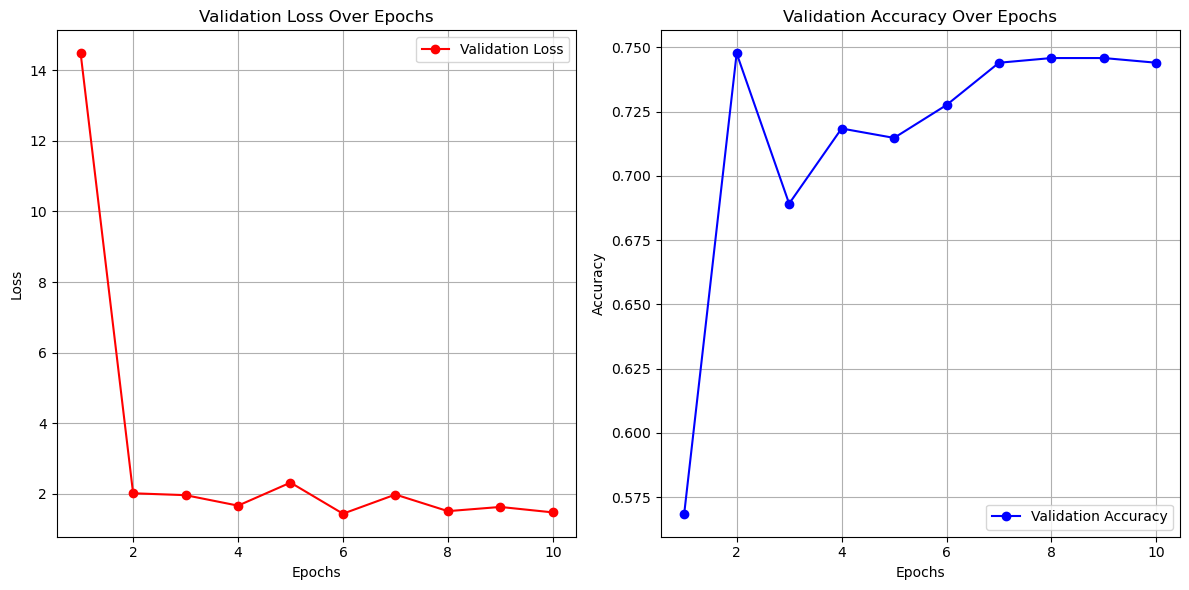

In [7]:
# Validate the presence of validation keys
if 'val_loss' not in history.history or 'val_accuracy' not in history.history:
    print("Validation data not available in history.")
else:
    # Get validation loss and accuracy
    validation_loss = history.history['val_loss']
    validation_accuracy = history.history['val_accuracy']

    # Identify epochs with minimum loss and maximum accuracy
    min_loss_epoch = validation_loss.index(min(validation_loss)) + 1
    max_accuracy_epoch = validation_accuracy.index(max(validation_accuracy)) + 1

    # Print validation results summary
    print("\nValidation Results Summary:")
    print(f"Minimum Validation Loss: {min(validation_loss):.4f} at Epoch {min_loss_epoch}")
    print(f"Maximum Validation Accuracy: {max(validation_accuracy):.4f} at Epoch {max_accuracy_epoch}")

    # Optionally, plot the validation loss and accuracy over epochs
    import matplotlib.pyplot as plt

    # Plot Validation Loss and Accuracy
    epochs_range = range(1, len(validation_loss) + 1)
    plt.figure(figsize=(12, 6))

    # Validation Loss Plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, validation_loss, marker='o', label="Validation Loss", color='red')
    plt.title("Validation Loss Over Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)
    plt.legend()

    # Validation Accuracy Plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, validation_accuracy, marker='o', label="Validation Accuracy", color='blue')
    plt.title("Validation Accuracy Over Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()

109/109 ━━━━━━━━━━━━━━━━━━━━ 74s 558ms/step


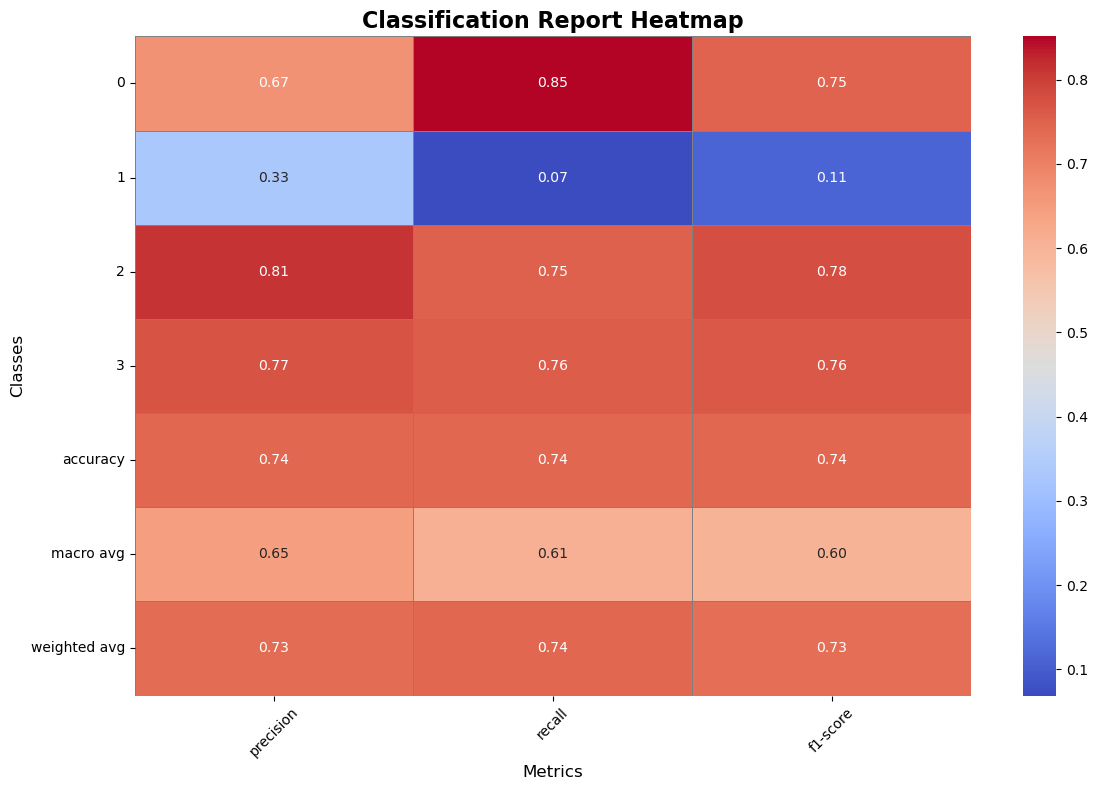


Summary of Key Metrics:
Accuracy: 0.7441
Macro Average F1-Score: 0.6020
Weighted Average F1-Score: 0.7311


In [8]:
# Generate predictions and classification report
Y_pred = model.predict(test_data_gen, steps=test_data_gen.samples // batch_size)
val_preds = np.argmax(Y_pred, axis=1)
val_trues = test_data_gen.classes

# Generate classification report and convert to DataFrame
from sklearn.metrics import classification_report
report_dict = classification_report(val_trues, val_preds, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()

# Plot the heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# Highlight macro and weighted averages in the heatmap
sns.heatmap(
    report_df.iloc[:, :-1],  # Exclude the `support` column if needed
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    cbar=True,
    annot_kws={"size": 10},
    linewidths=0.5,
    linecolor="gray"
)

# Customizing the heatmap
plt.title("Classification Report Heatmap", fontsize=16, fontweight='bold')
plt.xticks(rotation=45, fontsize=10)
plt.yticks(rotation=0, fontsize=10)

# Adding axis labels
plt.xlabel("Metrics", fontsize=12)
plt.ylabel("Classes", fontsize=12)

# Adjust layout for better visualization
plt.tight_layout()

# Show the plot
plt.show()

# Print summary of key metrics
print("\nSummary of Key Metrics:")
print(f"Accuracy: {report_dict['accuracy']:.4f}")
print(f"Macro Average F1-Score: {report_dict['macro avg']['f1-score']:.4f}")
print(f"Weighted Average F1-Score: {report_dict['weighted avg']['f1-score']:.4f}")
